In [11]:
import pandas as pd

In [12]:
import numpy as np

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv("settles.acl16.learning_traces.13m.csv")

In [15]:
df.head()

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct
0,1.0,1362076081,27649635,u:FO,de,en,76390c1350a8dac31186187e2fe1e178,lernt/lernen<vblex><pri><p3><sg>,6,4,2,2
1,0.5,1362076081,27649635,u:FO,de,en,7dfd7086f3671685e2cf1c1da72796d7,die/die<det><def><f><sg><nom>,4,4,2,1
2,1.0,1362076081,27649635,u:FO,de,en,35a54c25a2cda8127343f6a82e6f6b7d,mann/mann<n><m><sg><nom>,5,4,1,1
3,0.5,1362076081,27649635,u:FO,de,en,0cf63ffe3dda158bc3dbd55682b355ae,frau/frau<n><f><sg><nom>,6,5,2,1
4,1.0,1362076081,27649635,u:FO,de,en,84920990d78044db53c1b012f5bf9ab5,das/das<det><def><nt><sg><nom>,4,4,1,1


13518

In [6]:
df.shape

(12854226, 12)

In [7]:
df["learning_language"].value_counts()

en    5014791
es    3407689
fr    1873734
de    1452597
it     793935
pt     311480
Name: learning_language, dtype: int64

In [8]:
df["ui_language"].value_counts()

en    7839435
es    3641179
pt     949460
it     424152
Name: ui_language, dtype: int64

In [6]:
ll = list(df.learning_language)
ul = list(df.ui_language)
courses = list(zip(ul,ll))

In [7]:
unique_courses = list(set(courses))
unique_courses

[('en', 'es'),
 ('pt', 'en'),
 ('en', 'pt'),
 ('en', 'it'),
 ('en', 'fr'),
 ('it', 'en'),
 ('en', 'de'),
 ('es', 'en')]

In [11]:
len(set(courses))

8

In [12]:
unique_courses[0][0]

'es'

In [13]:
len(df.loc[(df.learning_language == 'de') & (df.ui_language == 'en')])

1452597

In [8]:
{course: len(df.loc[(df.learning_language == course[1]) & (df.ui_language == course[0])]) for course in unique_courses}
    

{('en', 'es'): 3407689,
 ('pt', 'en'): 949460,
 ('en', 'pt'): 311480,
 ('en', 'it'): 793935,
 ('en', 'fr'): 1873734,
 ('it', 'en'): 424152,
 ('en', 'de'): 1452597,
 ('es', 'en'): 3641179}

In [19]:
course_list = [it_learn_eng, es_learn_eng, pt_learn_eng, eng_learn_de, eng_learn_es, eng_learn_fr, eng_learn_it, eng_learn_pt]

In [20]:
robustness = {"{} learning {}".format(course[0], course[1]): len(set(df.loc[(df.learning_language == course[1]) & (df.ui_language == course[0])].lexeme_id)) for course in unique_courses}
robustness

{'en learning es': 3302,
 'pt learning en': 2812,
 'en learning pt': 2815,
 'en learning it': 2186,
 'en learning fr': 4184,
 'it learning en': 2428,
 'en learning de': 3809,
 'es learning en': 2881}

In [18]:
robustness['en learning it']

2186

In [19]:
for k, v in robustness.items():
    print(v, k[:2], k[-2:])

2881 es en
2815 en pt
2428 it en
2812 pt en
4184 en fr
2186 en it
3809 en de
3302 en es


In [21]:
list(robustness.keys())

['en learning es',
 'pt learning en',
 'en learning pt',
 'en learning it',
 'en learning fr',
 'it learning en',
 'en learning de',
 'es learning en']

In [22]:
course_nums = list(enumerate(list(robustness.keys())))
course_nums

[(0, 'en learning es'),
 (1, 'pt learning en'),
 (2, 'en learning pt'),
 (3, 'en learning it'),
 (4, 'en learning fr'),
 (5, 'it learning en'),
 (6, 'en learning de'),
 (7, 'es learning en')]

In [23]:
conditions = [
    ((df['learning_language'] == k[-2:]) & (df['ui_language'] == k[:2])) 
    for k in list(robustness.keys())]
choices = [v[0] for v in course_nums]
df['course_num'] = np.select(conditions, choices)

In [71]:
len(set(df.user_id))

115222

In [23]:
df.head(20)

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct,course_num
0,1.000000,1362076081,27649635,u:FO,de,en,76390c1350a8dac31186187e2fe1e178,lernt/lernen<vblex><pri><p3><sg>,6,4,2,2,6
1,0.500000,1362076081,27649635,u:FO,de,en,7dfd7086f3671685e2cf1c1da72796d7,die/die<det><def><f><sg><nom>,4,4,2,1,6
2,1.000000,1362076081,27649635,u:FO,de,en,35a54c25a2cda8127343f6a82e6f6b7d,mann/mann<n><m><sg><nom>,5,4,1,1,6
3,0.500000,1362076081,27649635,u:FO,de,en,0cf63ffe3dda158bc3dbd55682b355ae,frau/frau<n><f><sg><nom>,6,5,2,1,6
4,1.000000,1362076081,27649635,u:FO,de,en,84920990d78044db53c1b012f5bf9ab5,das/das<det><def><nt><sg><nom>,4,4,1,1,6
5,1.000000,1362076081,27649635,u:FO,de,en,56429751fdaedb6e491f4795c770f5a4,der/der<det><def><m><sg><nom>,4,3,1,1,6
6,1.000000,1362076081,27649635,u:FO,de,en,1bacf218eaaf9f944e525f7be9b31899,kind/kind<n><nt><sg><nom>,4,4,1,1,6
7,1.000000,1362082032,444407,u:dDwF,es,en,73eecb492ca758ddab5371cf7b5cca32,bajo/bajo<pr>,3,3,1,1,7
8,1.000000,1362082044,5963,u:FO,de,en,76390c1350a8dac31186187e2fe1e178,lernt/lernen<vblex><pri><p3><sg>,8,6,6,6,6
9,0.750000,1362082044,5963,u:FO,de,en,7dfd7086f3671685e2cf1c1da72796d7,die/die<det><def><f><sg><nom>,6,5,4,3,6


In [59]:
it_learn_eng =df.loc[(df.learning_language == 'en') & (df.ui_language == 'it')]
es_learn_eng =df.loc[(df.learning_language == 'en') & (df.ui_language == 'es')]
pt_learn_eng =df.loc[(df.learning_language == 'en') & (df.ui_language == 'pt')]
eng_learn_it =df.loc[(df.learning_language == 'it') & (df.ui_language == 'en')]
eng_learn_es =df.loc[(df.learning_language == 'es') & (df.ui_language == 'en')]
eng_learn_pt =df.loc[(df.learning_language == 'pt') & (df.ui_language == 'en')]
eng_learn_fr =df.loc[(df.learning_language == 'fr') & (df.ui_language == 'en')]
eng_learn_de =df.loc[(df.learning_language == 'de') & (df.ui_language == 'en')]

In [25]:
len(it_learn_eng)

424152

Text(0.5, 1.0, 'proportion recalled vs history seen (italian learning english)')

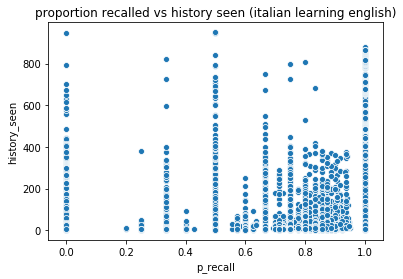

In [29]:
sns.scatterplot(y=it_learn_eng.history_seen, x= it_learn_eng.p_recall)
plt.title("proportion recalled vs history seen (italian learning english)")

Text(0.5, 1.0, 'proportion recalled vs last time seen seen (italian learning english)')

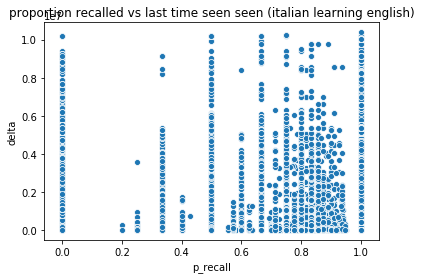

In [30]:
sns.scatterplot(y=it_learn_eng.delta, x= it_learn_eng.p_recall)
plt.title("proportion recalled vs last time seen seen (italian learning english)")

In [32]:
it_learn_eng.loc[it_learn_eng.session_seen>1]

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct,course_num
136,1.000000,1362082525,610672,u:hX-p,en,it,390ca9c2868c14c5616c460e4f31762c,women/woman<n><pl>,36,36,3,3,2
137,1.000000,1362082525,271,u:hX-p,en,it,b968b069e4e2c04848e9f8924e34c031,we/prpers<prn><subj><p1><mf><pl>,76,67,4,4,2
138,1.000000,1362082525,92504,u:hX-p,en,it,efc2c65bd3a2ab7e0e2d4db65e290699,read/read<vblex><pres>,61,54,6,6,2
139,0.750000,1362082525,5265,u:hX-p,en,it,e16c578226476ae646530b6356f9b0ad,newspaper/newspaper<n><sg>,42,39,4,3,2
140,1.000000,1362082525,92504,u:hX-p,en,it,b573a2ebb834b1346202143003738756,girls/girl<n><pl>,28,22,2,2,2
141,1.000000,1362082525,6185,u:hX-p,en,it,6467457ef675ada64c360e7d17642aaf,men/man<n><pl>,59,54,2,2,2
142,0.500000,1362082525,94019,u:hX-p,en,it,e296b8e7737593b36ec7583275c790fe,boys/boy<n><pl>,45,38,2,1,2
771,0.750000,1362082571,338093,u:hIRn,en,it,9443f902cdcf9f4da3b5f58d3f657efe,you/prpers<@ij:thank_you>,8,7,4,3,2
772,1.000000,1362082571,338093,u:hIRn,en,it,ee83763629a0d5a538c07e65bfd65593,please/please<adv>,5,4,2,2,2
774,0.857143,1362082571,338093,u:hIRn,en,it,33a7fd42f74b2d2b1110f1b0c8b6db38,not/not<adv>,9,9,7,6,2


Text(0.5, 1.0, 'proportion recalled vs history seen (italian learning english)')

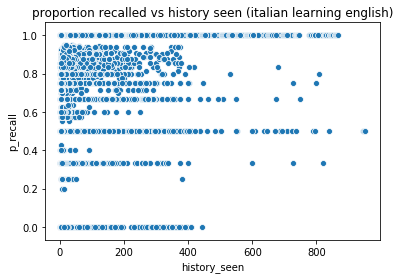

In [35]:
sns.scatterplot(x="history_seen", y= "p_recall", data = it_learn_eng.loc[it_learn_eng.session_seen>1])
plt.title("proportion recalled vs history seen (italian learning english)")

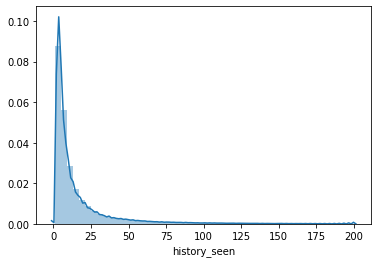

In [38]:
sns.distplot(it_learn_eng.loc[it_learn_eng.history_seen < 200].history_seen)

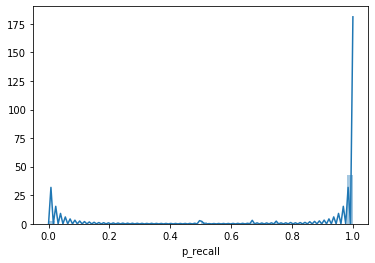

In [39]:
sns.distplot(it_learn_eng.p_recall)

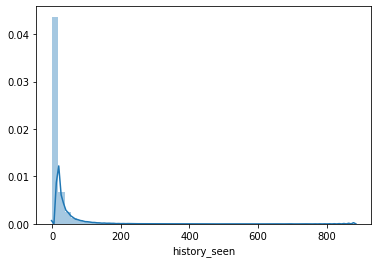

In [40]:
sns.distplot(it_learn_eng.loc[it_learn_eng.p_recall == 1].history_seen)

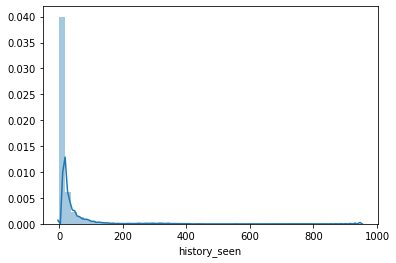

In [41]:
sns.distplot(it_learn_eng.loc[it_learn_eng.p_recall == 0].history_seen)

In [46]:
it_learn_eng.loc[it_learn_eng.user_id == 'u:hX-p']

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct,course_num
136,1.000000,1362082525,610672,u:hX-p,en,it,390ca9c2868c14c5616c460e4f31762c,women/woman<n><pl>,36,36,3,3,2
137,1.000000,1362082525,271,u:hX-p,en,it,b968b069e4e2c04848e9f8924e34c031,we/prpers<prn><subj><p1><mf><pl>,76,67,4,4,2
138,1.000000,1362082525,92504,u:hX-p,en,it,efc2c65bd3a2ab7e0e2d4db65e290699,read/read<vblex><pres>,61,54,6,6,2
139,0.750000,1362082525,5265,u:hX-p,en,it,e16c578226476ae646530b6356f9b0ad,newspaper/newspaper<n><sg>,42,39,4,3,2
140,1.000000,1362082525,92504,u:hX-p,en,it,b573a2ebb834b1346202143003738756,girls/girl<n><pl>,28,22,2,2,2
141,1.000000,1362082525,6185,u:hX-p,en,it,6467457ef675ada64c360e7d17642aaf,men/man<n><pl>,59,54,2,2,2
142,0.500000,1362082525,94019,u:hX-p,en,it,e296b8e7737593b36ec7583275c790fe,boys/boy<n><pl>,45,38,2,1,2
3859,1.000000,1362082727,202,u:hX-p,en,it,390ca9c2868c14c5616c460e4f31762c,women/woman<n><pl>,39,39,1,1,2
3860,1.000000,1362082727,93085,u:hX-p,en,it,335fe9380e553c323369a8509bcc00f6,reads/read<vblex><pri><p3><sg>,33,27,1,1,2
3861,1.000000,1362082727,473,u:hX-p,en,it,55f383178cf0fdc463ef1ebf91bd288d,milk/milk<n><sg>,67,55,2,2,2


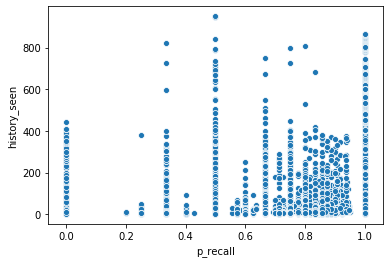

In [53]:
sns.scatterplot(x="p_recall", y = "history_seen", 
                data = it_learn_eng.loc[(it_learn_eng.session_seen>1)&(it_learn_eng.session_seen != it_learn_eng.history_seen)])

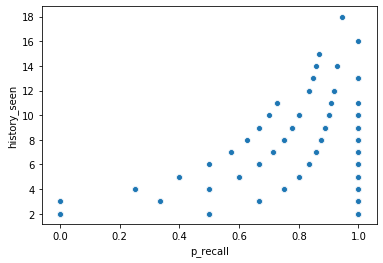

In [69]:
sns.scatterplot(x="p_recall", y = "history_seen", 
                data = it_learn_eng.loc[(it_learn_eng.session_seen>1)&(it_learn_eng.session_seen == it_learn_eng.history_seen)])

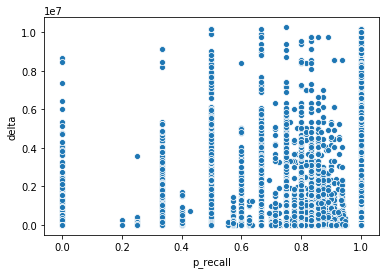

In [55]:
sns.scatterplot(x="p_recall", y = "delta", 
                data = it_learn_eng.loc[(it_learn_eng.session_seen>1)&(it_learn_eng.session_seen != it_learn_eng.history_seen)])

In [59]:
type(list(it_learn_eng.delta)[0])

int

In [62]:
type(it_learn_eng.delta[136])

numpy.int64

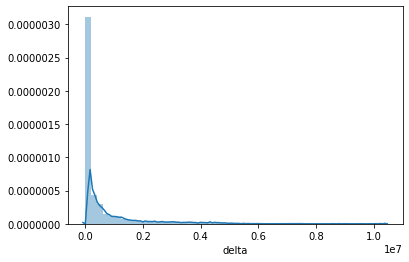

In [63]:
sns.distplot(it_learn_eng.delta)

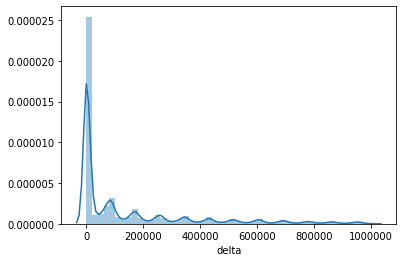

In [65]:
sns.distplot(it_learn_eng.loc[it_learn_eng.delta<1000000].delta)

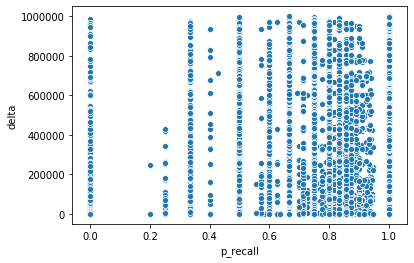

In [66]:
sns.scatterplot(x="p_recall", y = "delta", 
                data = it_learn_eng.loc[it_learn_eng.delta<1000000].loc[(it_learn_eng.loc[it_learn_eng.delta<1000000].session_seen>1)&(it_learn_eng.loc[it_learn_eng.delta<1000000].session_seen != it_learn_eng.loc[it_learn_eng.delta<1000000].history_seen)])



In [ ]:
sns.scatterplot(x="delta", y = "p_recall", 
                data = it_learn_eng.loc[it_learn_eng.delta>1000000].loc[(it_learn_eng.loc[it_learn_eng.delta>1000000].session_seen>1)&(it_learn_eng.loc[it_learn_eng.delta>1000000].session_seen != it_learn_eng.loc[it_learn_eng.delta>1000000].history_seen)])


In [70]:
np.log(it_learn_eng.delta)

136         13.322315
137          5.602119
138         11.435007
139          8.568836
140         11.435007
141          8.729882
142         11.451252
771         12.731076
772         12.731076
773         12.731076
774         12.731076
775         12.731076
776         12.731076
777         12.731076
778         12.731076
811         14.408014
812         15.299513
813         13.313600
814         14.473943
815         12.981627
816         14.697640
817          9.783803
818          9.783803
819         13.313600
820         13.451592
821          9.783803
822         14.455924
823         14.453498
824         13.013706
825          9.783803
              ...    
12853245    12.971496
12853623     4.983607
12853624     4.983607
12853625     4.983607
12853626     4.983607
12853627     4.983607
12853628     4.983607
12853629     4.983607
12853630     4.983607
12853631     4.983607
12853632     4.983607
12853633     4.983607
12853634     4.983607
12853635     4.983607
12853636  

In [106]:
it_learn_eng = it_learn_eng.sort_values(['user_id','timestamp'], ascending=[True, True])
it_learn_eng.head()

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct,course_num,consec_word_delta
3004639,1.0,1362330934,252471,u:HDJ,en,it,9057a1c1deac19da984def346b0a2806,also/also<adv>,13,12,3,3,2,3.0
3004638,1.0,1362330934,252471,u:HDJ,en,it,efd1bf64096cdecc2ac7bf5c96badb9e,well/well<adv>,7,6,2,2,2,0.0
3004637,1.0,1362330934,252471,u:HDJ,en,it,b7734a9e942f3e39f2d20b72bb598add,once/once<adv>,11,10,4,4,2,0.0
3004636,1.0,1362330934,252471,u:HDJ,en,it,4a4c57cc0632cb297e94efc594db617a,only/only<adv>,14,13,3,3,2,0.0
3004635,1.0,1362330934,252471,u:HDJ,en,it,cff2d760888774c8011ed92d80ae3312,always/always<adv>,15,15,3,3,2,0.0


In [114]:
it_learn_eng['consec_word_delta'] = it_learn_eng['timestamp'].diff()
it_learn_eng[30:]

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct,course_num,consec_word_delta
6517461,1.000000,1362596504,263084,u:HDJ,en,it,fbe67675995a14ca58c2add83bfeb82e,sometimes/sometimes<adv>,3,3,3,3,2,0.0
6517460,0.500000,1362596504,263084,u:HDJ,en,it,5d18cd4fabff702610801f518e44c713,finally/finally<adv>,2,2,2,1,2,0.0
6517459,0.666667,1362596504,263084,u:HDJ,en,it,d1a4760e4a5b9d56a4300a60f362fc63,completely/completely<adv>,3,3,3,2,2,0.0
6517463,1.000000,1362596504,263084,u:HDJ,en,it,7e85dc79c556beb6ca71b2363bbbb9b9,generally/generally<adv>,1,1,3,3,2,0.0
6517464,0.666667,1362596504,263084,u:HDJ,en,it,3445a3148b0eee9f34d06673fdd67b29,easily/easily<adv>,4,3,3,2,2,0.0
9859974,1.000000,1362859805,2967543,u:HDJ,en,it,295b2aeed6ae21efe706eea21af1fd8e,reader/reader<n><sg>,2,2,2,2,2,263301.0
9860594,0.500000,1362859853,48,u:HDJ,en,it,295b2aeed6ae21efe706eea21af1fd8e,reader/reader<n><sg>,4,4,2,1,2,48.0
9860993,1.000000,1362859878,25,u:HDJ,en,it,295b2aeed6ae21efe706eea21af1fd8e,reader/reader<n><sg>,6,5,2,2,2,25.0
9861706,1.000000,1362859924,46,u:HDJ,en,it,295b2aeed6ae21efe706eea21af1fd8e,reader/reader<n><sg>,8,7,2,2,2,46.0
10717926,1.000000,1362937395,550,u:HDJ,en,it,80fa96d931f22e78c4a1dd78eff7c9ed,beach/beach<n><sg>,2,2,2,2,2,77471.0


In [82]:
i= it_learn_eng.groupby('user_id')

In [28]:
it_learn_eng.groupby('lexeme_id').max()

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_string,history_seen,history_correct,session_seen,session_correct
lexeme_id,,,,,,,,,,,
000f3063358c188d171d903ec5a7855c,1.000000,1363103891,5198103,u:in_9,en,it,garden/garden<n><sg>,22,14,20,19
0023799f4a7ed08c8dc3591efee8c049,1.000000,1363101313,5342678,u:ilcA,en,it,cinema/cinema<n><sg>,11,11,5,5
0026e0c4c4ea2d3adfee4e9343e849d9,1.000000,1363101560,4966848,u:izZ8,en,it,afraid/afraid<adj>,26,24,3,3
0032946f927663ecef94ffba0a4c487d,1.000000,1363092925,4669932,u:ik0E,en,it,abroad/abroad<adv>,23,22,6,6
005c76e47ebbcd5c0a2c7f2e68c830ee,1.000000,1363099228,5191670,u:ilcA,en,it,<*sf>/friend<n><*numb>,10,10,3,3
00602b2e8661dcb34a65779e484a3550,1.000000,1362994862,4067492,u:gfyS,en,it,congress/congress<n><sg>,6,6,1,1
00654625f5f1f060483bebe64bc75b88,1.000000,1363023867,470384,u:iXIb,en,it,<*sf>/lawyer<n><*numb>,3,3,2,2
006d219f6d6b7724731f28ba3451dabc,1.000000,1363037642,3219462,u:hPF7,en,it,assumed/assume<vblex><pp><@present_perfect>,17,7,4,3
007752df1235753d49a00f5f08d83652,1.000000,1363099282,1496893,u:hEfD,en,it,humor/humor<n><sg>,11,10,3,3


In [34]:
it_learn_eng.user_id.value_counts()

u:gL_n    4886
u:grFL    4072
u:id2j    3106
u:iOOh    2578
u:fPSy    2465
u:g-LD    2377
u:hX-p    2290
u:hBr1    2184
u:ik4g    2103
u:e51T    2060
u:gfyS    1979
u:g1Sg    1911
u:hYlH    1785
u:h3WL    1654
u:eY8y    1490
u:e6pB    1489
u:eW6f    1455
u:iisA    1406
u:iTE0    1361
u:gfKW    1351
u:gbGr    1333
u:i0bX    1332
u:iHPX    1325
u:gPUD    1295
u:ilcA    1239
u:gAnU    1235
u:fwI1    1231
u:gboZ    1217
u:e_F7    1215
u:hhj2    1212
          ... 
u:iK77       1
u:gcpb       1
u:ioYe       1
u:iuRS       1
u:iN5S       1
u:gp34       1
u:haH4       1
u:izwR       1
u:iUuV       1
u:g4Td       1
u:ihfW       1
u:jdDH       1
u:hxiV       1
u:iuHk       1
u:iHKC       1
u:gOU2       1
u:h4FI       1
u:i5ND       1
u:iWpb       1
u:gmXO       1
u:iqle       1
u:ipsq       1
u:gsWG       1
u:hwdo       1
u:h6En       1
u:iGca       1
u:gdXr       1
u:hMYw       1
u:iVHL       1
u:gHCc       1
Name: user_id, Length: 3436, dtype: int64

In [46]:
have_one_user = it_learn_eng.loc[it_learn_eng.user_id == 'u:gL_n'].loc[it_learn_eng.lexeme_id == '6d4c572af8022cb4784ce0f8898d1905']
have_one_user.head()

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct
680856,0.0,1362134931,64063,u:gL_n,en,it,6d4c572af8022cb4784ce0f8898d1905,to/to<pr>,206,80,1,0
683576,0.0,1362135257,327,u:gL_n,en,it,6d4c572af8022cb4784ce0f8898d1905,to/to<pr>,207,80,1,0
694354,1.0,1362136735,1478,u:gL_n,en,it,6d4c572af8022cb4784ce0f8898d1905,to/to<pr>,208,80,1,1
694860,0.0,1362136807,72,u:gL_n,en,it,6d4c572af8022cb4784ce0f8898d1905,to/to<pr>,209,81,1,0
697212,0.5,1362137059,253,u:gL_n,en,it,6d4c572af8022cb4784ce0f8898d1905,to/to<pr>,210,81,2,1


In [94]:
it_learn_eng.loc[it_learn_eng.timestamp == 1362134933]

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct,course_num,overall_recall,session-overall


In [115]:
users = list(set(it_learn_eng.user_id))
len(users)

3436

In [117]:
it_learn_eng = it_learn_eng.sort_values(['user_id', 'timestamp'])

In [138]:
sorted(timestamp_list)

[1362082525,
 1362082570,
 1362082571,
 1362082606,
 1362082609,
 1362082660,
 1362082664,
 1362082666,
 1362082727,
 1362082735,
 1362082747,
 1362082762,
 1362082820,
 1362082823,
 1362082836,
 1362082868,
 1362082891,
 1362082892,
 1362082911,
 1362082949,
 1362082961,
 1362082999,
 1362083001,
 1362083010,
 1362083016,
 1362083031,
 1362083035,
 1362083047,
 1362083074,
 1362083075,
 1362083084,
 1362083105,
 1362083115,
 1362083122,
 1362083127,
 1362083150,
 1362083151,
 1362083155,
 1362083159,
 1362083173,
 1362083176,
 1362083199,
 1362083205,
 1362083209,
 1362083222,
 1362083294,
 1362083310,
 1362083327,
 1362083329,
 1362083336,
 1362083340,
 1362083346,
 1362083370,
 1362083393,
 1362083404,
 1362083424,
 1362083432,
 1362083447,
 1362083467,
 1362083491,
 1362083516,
 1362083538,
 1362083553,
 1362083611,
 1362083642,
 1362083659,
 1362083726,
 1362083742,
 1362083767,
 1362083814,
 1362083834,
 1362083835,
 1362083840,
 1362083857,
 1362083897,
 1362083922,
 1362083927,

In [139]:
timestamp_list = sorted(list(set(it_learn_eng.timestamp)))
num_list = list(range(0,len(timestamp_list)))
time_num_dict = dict(zip(timestamp_list, num_list))

session_id = [time_num_dict.get(n, n) for n in list(it_learn_eng.timestamp)]
it_learn_eng['session_id'] = session_id

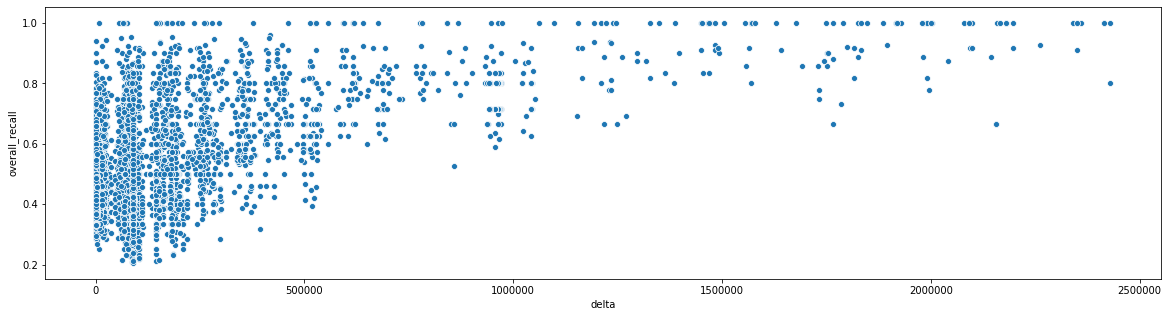

In [62]:
f,ax = plt.subplots(figsize = (20,5))
sns.scatterplot(x='delta', y = 'overall_recall', data = it_learn_eng.loc[it_learn_eng.user_id == 'u:gL_n'].loc[it_learn_eng.history_seen != it_learn_eng.session_seen])

In [58]:
df['overall_recall'] = df['history_correct']/df['history_seen']

In [63]:
df['session-overall'] = df['p_recall'] - df['overall_recall']
df.head()

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct,course_num,overall_recall,session-overall
0,1.0,1362076081,27649635,u:FO,de,en,76390c1350a8dac31186187e2fe1e178,lernt/lernen<vblex><pri><p3><sg>,6,4,2,2,6,0.666667,0.333333
1,0.5,1362076081,27649635,u:FO,de,en,7dfd7086f3671685e2cf1c1da72796d7,die/die<det><def><f><sg><nom>,4,4,2,1,6,1.000000,-0.500000
2,1.0,1362076081,27649635,u:FO,de,en,35a54c25a2cda8127343f6a82e6f6b7d,mann/mann<n><m><sg><nom>,5,4,1,1,6,0.800000,0.200000
3,0.5,1362076081,27649635,u:FO,de,en,0cf63ffe3dda158bc3dbd55682b355ae,frau/frau<n><f><sg><nom>,6,5,2,1,6,0.833333,-0.333333
4,1.0,1362076081,27649635,u:FO,de,en,84920990d78044db53c1b012f5bf9ab5,das/das<det><def><nt><sg><nom>,4,4,1,1,6,1.000000,0.000000


In [64]:
it_learn_eng =df.loc[(df.learning_language == 'en') & (df.ui_language == 'it')]
es_learn_eng =df.loc[(df.learning_language == 'en') & (df.ui_language == 'es')]
pt_learn_eng =df.loc[(df.learning_language == 'en') & (df.ui_language == 'pt')]
eng_learn_it =df.loc[(df.learning_language == 'it') & (df.ui_language == 'en')]
eng_learn_es =df.loc[(df.learning_language == 'es') & (df.ui_language == 'en')]
eng_learn_pt =df.loc[(df.learning_language == 'pt') & (df.ui_language == 'en')]
eng_learn_fr =df.loc[(df.learning_language == 'fr') & (df.ui_language == 'en')]
eng_learn_de =df.loc[(df.learning_language == 'de') & (df.ui_language == 'en')]

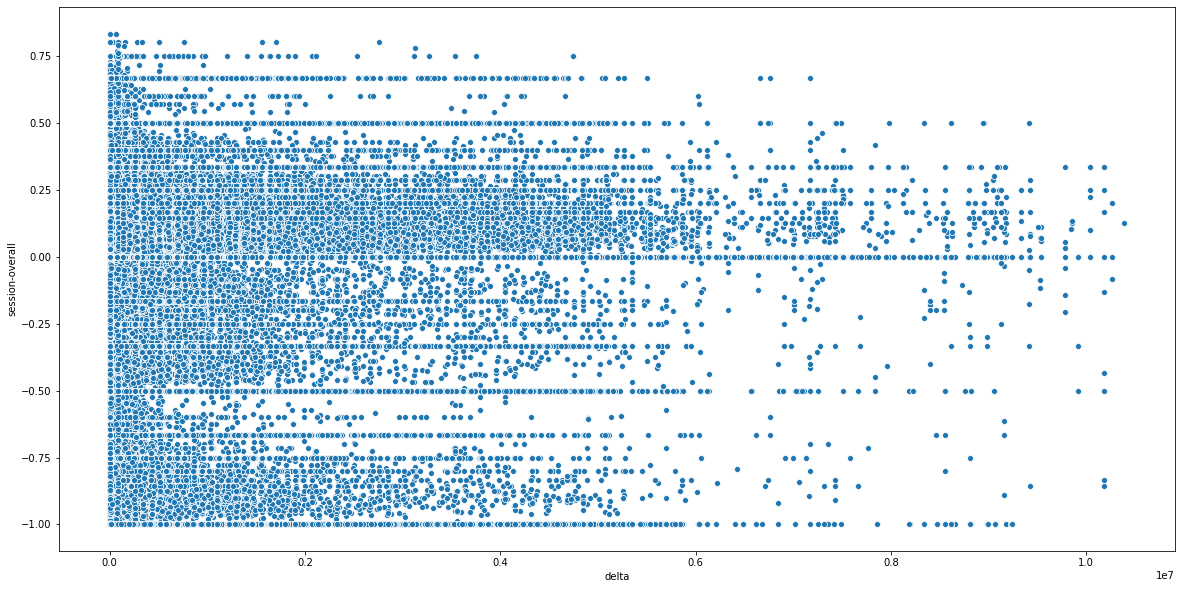

In [67]:
f,ax = plt.subplots(figsize = (20,10))

sns.scatterplot(x='delta', y = 'session-overall', data = it_learn_eng)

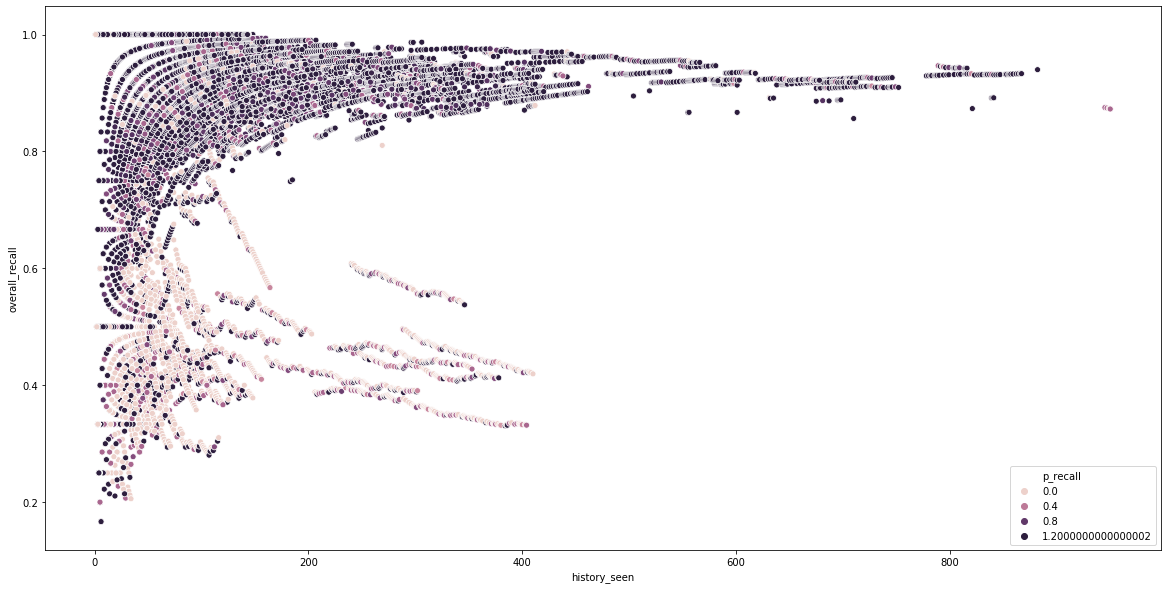

In [167]:
f,ax = plt.subplots(figsize = (20,10))
sns.scatterplot(y= it_learn_eng.overall_recall, x = it_learn_eng.history_seen,hue = it_learn_eng.p_recall)

In [163]:
it_learn_eng.sort_values(['user_id', 'timestamp'])

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct,course_num,overall_recall,session-overall,session_id
3004633,1.000000,1362330934,252471,u:HDJ,en,it,dbb7591f283beec7f6ef3b4a07cc05a3,even/even<adv>,11,10,3,3,5,0.909091,0.090909,5934
3004634,0.500000,1362330934,252471,u:HDJ,en,it,22ae70952558ea3b3e01f94ce3a50bbd,just/just<adv>,8,4,2,1,5,0.500000,0.000000,5934
3004635,1.000000,1362330934,252471,u:HDJ,en,it,cff2d760888774c8011ed92d80ae3312,always/always<adv>,15,15,3,3,5,1.000000,0.000000,5934
3004636,1.000000,1362330934,252471,u:HDJ,en,it,4a4c57cc0632cb297e94efc594db617a,only/only<adv>,14,13,3,3,5,0.928571,0.071429,5934
3004637,1.000000,1362330934,252471,u:HDJ,en,it,b7734a9e942f3e39f2d20b72bb598add,once/once<adv>,11,10,4,4,5,0.909091,0.090909,5934
3004638,1.000000,1362330934,252471,u:HDJ,en,it,efd1bf64096cdecc2ac7bf5c96badb9e,well/well<adv>,7,6,2,2,5,0.857143,0.142857,5934
3004639,1.000000,1362330934,252471,u:HDJ,en,it,9057a1c1deac19da984def346b0a2806,also/also<adv>,13,12,3,3,5,0.923077,0.076923,5934
4088426,1.000000,1362417834,85471,u:HDJ,en,it,b011cfb5fe75c6c239cac9a4d9c3949f,ever/ever<adv>,3,3,2,2,5,1.000000,0.000000,8282
4088427,1.000000,1362417834,85471,u:HDJ,en,it,3edcfae2bcb5fb3e82a0f43943a7bc00,usually/usually<adv>,3,3,2,2,5,1.000000,0.000000,8282
4088428,1.000000,1362417834,85471,u:HDJ,en,it,1209c6ba1ea08c5fc464e3f763343c58,least/least<adv>,2,2,1,1,5,1.000000,0.000000,8282


In [182]:
session_user_dict = dict(zip(it_learn_eng.session_id, it_learn_eng.user_id))
final_dict = {}
for k,v in session_user_dict.items():
    if v not in final_dict:
        final_dict.update({v:[k]})
    else:
        final_dict[v].append(k)

each_user_sessions = final_dict
each_user_sessions

{'u:HDJ': [5934, 8282, 13657, 13720, 21309, 21310, 21311, 21315, 23354, 23619],
 'u:h0QZ': [8362, 2126, 2149, 2169, 2191, 2215, 3266, 3286, 3308, 8383],
 'u:b6hR': [6351, 9179, 9183],
 'u:bWhR': [7431, 7481, 11416, 14068, 16769, 21944, 26574],
 'u:beMr': [280],
 'u:c_61': [20731],
 'u:cro5': [1677, 1691],
 'u:d765': [27770],
 'u:dABa': [12002,
  13943,
  13986,
  13992,
  13997,
  18618,
  18622,
  18642,
  22796,
  25187,
  26259,
  26278],
 'u:dACm': [3074, 3132, 3145, 3153, 3162, 3174, 3346, 3351, 3356, 3375, 3399],
 'u:hSDt': [3182,
  17017,
  8921,
  578,
  586,
  3164,
  3169,
  3194,
  3201,
  3211,
  3222,
  3462,
  3474,
  3781,
  3805,
  3810,
  3812,
  3831,
  3854,
  9416,
  12500,
  15400,
  15477,
  16012,
  16036,
  16073,
  16994,
  17028,
  18300,
  20816,
  20830,
  23125,
  23155,
  23191,
  26176],
 'u:iMiU': [3367, 1286, 1294, 1420, 3362, 3371],
 'u:dAPj': [2068],
 'u:dASL': [22687],
 'u:dBT5': [107,
  137,
  1474,
  1587,
  8646,
  8662,
  8691,
  8723,
  8787,
  

In [195]:
v_list_each_user_sessions = list(each_user_sessions.values())
num_of_sessions_list_of_dicts = [dict(enumerate(val)) for val in v_list_each_user_sessions]
num_session = {}
for item in num_of_sessions_list_of_dicts:
    num_session.update({y:x for x,y in item.items()})

In [196]:
num_session

{5934: 0,
 8282: 1,
 13657: 2,
 13720: 3,
 21309: 4,
 21310: 5,
 21311: 6,
 21315: 7,
 23354: 8,
 23619: 9,
 8362: 0,
 2126: 1,
 2149: 2,
 2169: 3,
 2191: 4,
 2215: 5,
 3266: 6,
 3286: 7,
 3308: 8,
 8383: 9,
 6351: 0,
 9179: 1,
 9183: 2,
 7431: 0,
 7481: 1,
 11416: 2,
 14068: 3,
 16769: 4,
 21944: 5,
 26574: 6,
 280: 0,
 20731: 0,
 1677: 0,
 1691: 1,
 27770: 0,
 12002: 0,
 13943: 1,
 13986: 2,
 13992: 3,
 13997: 4,
 18618: 5,
 18622: 6,
 18642: 7,
 22796: 8,
 25187: 9,
 26259: 10,
 26278: 11,
 3074: 0,
 3132: 1,
 3145: 2,
 3153: 3,
 3162: 4,
 3174: 5,
 3346: 6,
 3351: 7,
 3356: 8,
 3375: 9,
 3399: 10,
 3182: 0,
 17017: 1,
 8921: 2,
 578: 3,
 586: 4,
 3164: 5,
 3169: 6,
 3194: 7,
 3201: 8,
 3211: 9,
 3222: 10,
 3462: 11,
 3474: 12,
 3781: 13,
 3805: 14,
 3810: 15,
 3812: 16,
 3831: 17,
 3854: 18,
 9416: 19,
 12500: 20,
 15400: 21,
 15477: 22,
 16012: 23,
 16036: 24,
 16073: 25,
 16994: 26,
 17028: 27,
 18300: 28,
 20816: 29,
 20830: 30,
 23125: 31,
 23155: 32,
 23191: 33,
 26176: 34,
 3

In [197]:
it_learn_eng['session_comp'] = it_learn_eng['session_id'].map(num_session)

In [200]:
it_learn_eng.tail(30)

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct,course_num,overall_recall,session-overall,session_id,session_comp
12833371,1.0,1363103525,230,u:jhqu,en,it,768f410a8fc1caa64ee36071082a231c,animal/animal<n><sg>,5,4,1,1,5,0.800000,0.200000,28009,0
12833372,1.0,1363103525,2290,u:jhqu,en,it,c52ab45d4e22ee7580041911159e3c0c,water/water<n><sg>,4,4,1,1,5,1.000000,0.000000,28009,0
12833373,1.0,1363103525,230,u:jhqu,en,it,bf608564b6e7c672a96cd7d1bb1d5f3f,crab/crab<n><sg>,4,4,2,2,5,1.000000,0.000000,28009,0
12834673,1.0,1363103612,88,u:jhqu,en,it,928787744a962cd4ec55c1b22cedc913,eats/eat<vblex><pri><p3><sg>,6,6,1,1,5,1.000000,0.000000,28013,1
12834674,1.0,1363103612,671,u:jhqu,en,it,81d3f527c32966c66d91396f06430cf8,elephant/elephant<n><sg>,1,1,1,1,5,1.000000,0.000000,28013,1
12834675,1.0,1363103612,2613,u:jhqu,en,it,aa94db3b587c7027e8505c25f6fc8ed9,apple/apple<n><sg>,4,4,1,1,5,1.000000,0.000000,28013,1
12834676,1.0,1363103612,88,u:jhqu,en,it,6b945b144608aa4e5b254baf20e2be77,cat/cat<n><sg>,3,3,1,1,5,1.000000,0.000000,28013,1
12834677,1.0,1363103612,2032,u:jhqu,en,it,c00649d7a795a4ad88d646ecab3cc07d,has/have<vblex><pri><p3><sg>,3,3,1,1,5,1.000000,0.000000,28013,1
12834678,1.0,1363103612,88,u:jhqu,en,it,827a8ecb89f9b59ac5c29b620a5d3ed6,a/a<det><ind><sg>,12,12,1,1,5,1.000000,0.000000,28013,1
12834679,1.0,1363103612,88,u:jhqu,en,it,768f410a8fc1caa64ee36071082a231c,animal/animal<n><sg>,6,5,1,1,5,0.833333,0.166667,28013,1


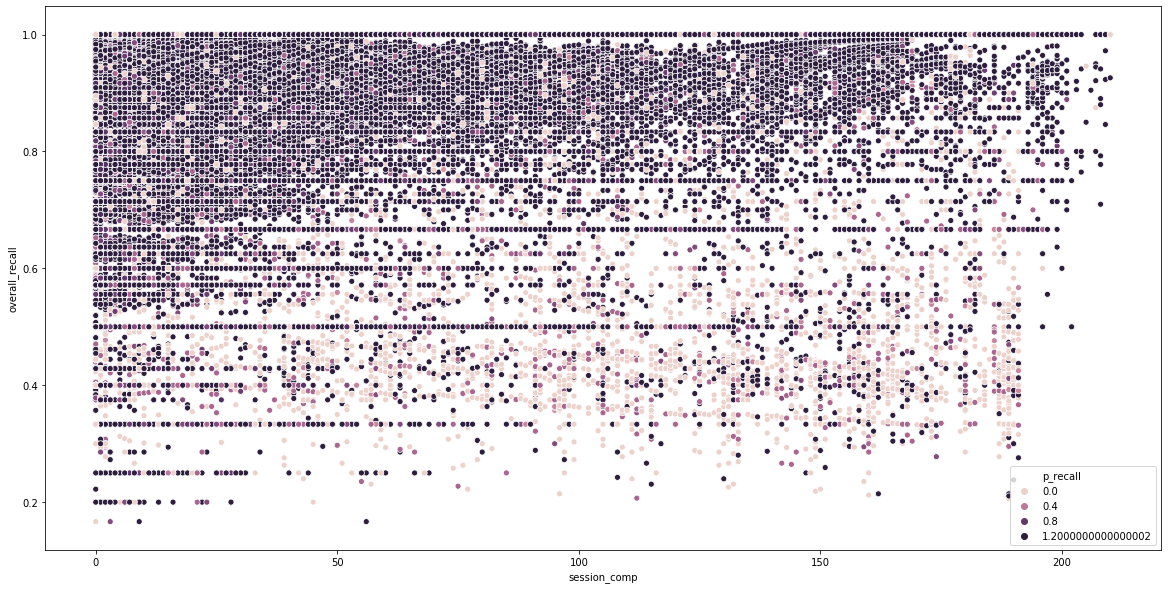

In [205]:
f,ax = plt.subplots(figsize = (20,10))
sns.scatterplot(x= it_learn_eng.session_comp, y = it_learn_eng.overall_recall, hue = it_learn_eng.p_recall)

In [ ]:
f,ax = plt.subplots(figsize = (20,10))
sns.scatterplot(x= 'session_comp', y = 'overall_recall', hue = 'p_recall', size = 'delta', sizes=(40, 400), alpha=.5, data = it_learn_eng)

